# **Advanced Topics**

# CNN-based Autoencoder Architecture

## 🧠 1. What Is a CNN-Based Autoencoder?

- It’s an encoder–bottleneck–decoder architecture built using convolutional neural networks (CNNs), tailored for image data.
  
- The encoder compresses spatial input into a compact feature map.

  
- The bottleneck (latent code) is the smallest representation.

  
- The decoder reconstructs the image from that latent code using deconvolutions or upsampling.


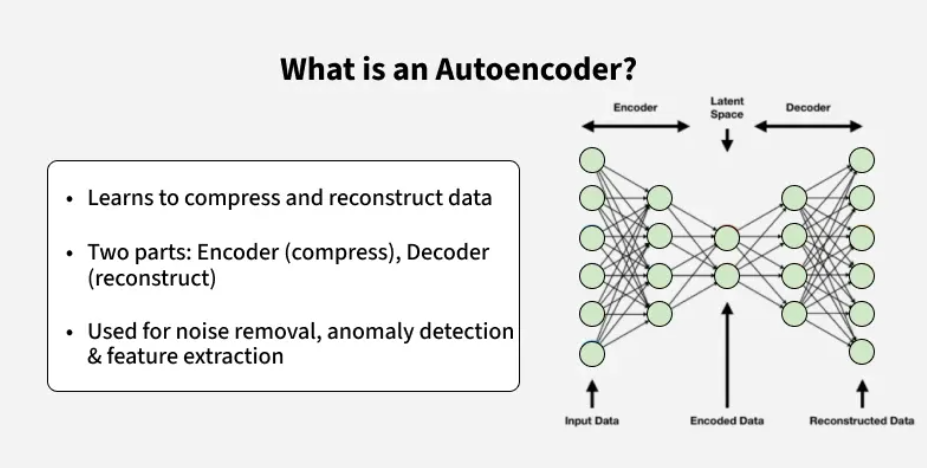

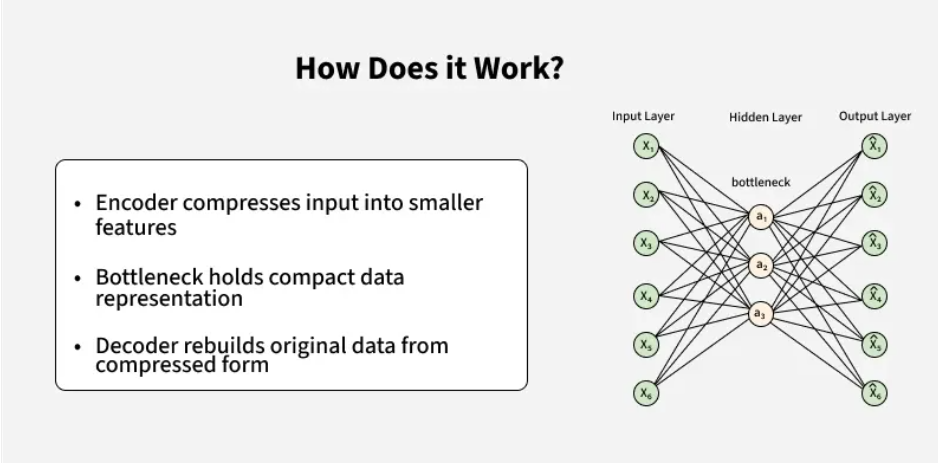

---

## Architecture of Autoencoder

An autoencoder’s architecture consists of three main components that work together to compress and then reconstruct data which are as follows:

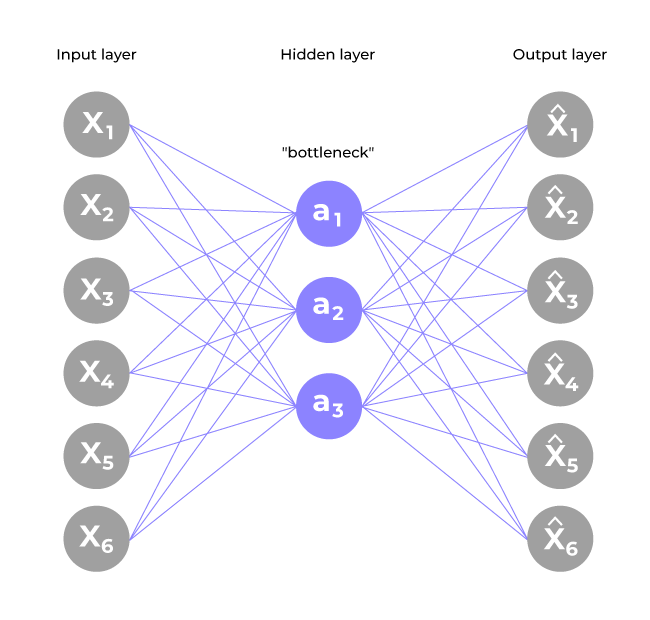

### A. Encoder

- Takes raw input (images, features, etc.) and applies transformations through hidden layers to reduce dimensionality.
  
- The latent vector produced at the encoder’s output holds the compressed representation.
  

### B. Bottleneck / Latent Space

- Tiny middle layer holding the most essential features.
  
- Forces the model to focus on what’s actually important—the core of compression/generalization.

### C. Decoder

- Mirrors the encoder in reverse: takes the latent code and reconstructs the input through hidden layers ending in the output layer.
  
- Quality is judged by how close output matches the original input

- Hidden Layers: These layers progressively expand the latent vector back into a higher-dimensional space. Through successive transformations decoder attempts to restore the original data shape and details.

  
- Output Layer: The final layer produces the reconstructed output which aims to closely resemble the original input. The quality of reconstruction depends on how well the encoder-decoder pair can minimize the difference between the input and output during training.

---

## **Loss Function in Autoencoder Training**

Training minimizes reconstruction loss, comparing original vs reconstructed outputs.

The choice of loss function depends on the type of data being processed:

- Mean Squared Error (MSE): This is commonly used for continuous data. It measures the average squared differences between the input and the reconstructed data.
  
- Binary Cross-Entropy: Used for binary data (0 or 1 values). It calculates the difference in probability between the original and reconstructed output.

Backpropagation updates weights to reduce this loss classic gradient descent or Adam optimizer.

---

## **Efficient Representations in Autoencoders**

Constraining an autoencoder helps it learn meaningful and compact features from the input data which leads to more efficient representations. After training only the encoder part is used to encode similar data for future tasks. Various techniques are used to achieve this are as follows:

- Keep Small Hidden Layers: Limiting the size of each hidden layer forces the network to focus on the most important features. Smaller layers reduce redundancy and allows efficient encoding.
  
- Regularization: Techniques like L1 and L1 regularization add penalty terms to the loss function. This prevents overfitting by removing excessively large weights which helps in ensuring the model to learns general and useful representations.

  
- Denoising: In denoising autoencoders random noise is added to the input during training. It learns to remove this noise during reconstruction which helps it focus on core, noise-free features and helps in improving robustness.

  
- Tuning the Activation Functions: Adjusting activation functions can promote sparsity by activating only a few neurons at a time. This sparsity reduces model complexity and forces the network to capture only the most relevant features.

---

## 📌 Types of Autoencoders

### 1️⃣ Denoising Autoencoder (DAE)

- Goal: Remove noise/corruption from inputs.
  
- Training: Feed corrupted input → reconstruct original clean data.

  
- Key Point: Prevents trivial memorization; forces network to learn robust core features.

  
- Use-case: Image denoising, speech enhancement.

---

### 2️⃣ Sparse Autoencoder (SAE)

- Structure: More hidden units than input features.
  
- Constraint: Only a few neurons active at once (sparsity constraint).

  
- How enforced:
    - Zeroing some hidden activations.
    - Adjusting activation functions.
    - Adding sparsity penalty (e.g., KL divergence) to loss.
- Use-case: Feature extraction, anomaly detection.

---

### 3️⃣ Variational Autoencoder (VAE)

- Concept: Learns probabilistic distribution of latent variables.

- Encoder: Produces mean (μ) & variance (σ²) of latent distribution.

- Decoder: Samples from this distribution to reconstruct/generate data.

- Optimization: Stochastic Gradient Descent + KL Divergence regularization.

- Use-case: Generative modeling → create new images, text, or data.

- Intuition: Learns smooth latent space where nearby points generate similar outputs.

---

### 4️⃣ Convolutional Autoencoder (CAE)

- Architecture: Uses CNN layers instead of fully connected layers.
    - Encoder: Convolutional layers → extract image features.
    - Decoder: Deconvolution (transposed conv) / Upsampling → reconstruct image.

- Strength: Exploits spatial locality & hierarchy of features in image data.

- Use-case: Image compression, denoising, anomaly detection, representation learning.

---

**⚡ Quick Table Recap**

| Type | Core Idea | Key Feature | Applications |
| --- | --- | --- | --- |
| **Denoising AE** | Remove noise | Learns robust features | Image denoising, speech |
| **Sparse AE** | Sparse activations | Penalize non-sparse neurons | Feature extraction |
| **Variational AE** | Probabilistic latent space | Learns distribution | Generative models |
| **Convolutional AE** | CNN layers | Enc/Dec with convs | Image tasks |

---

## 📌 Limitations of Autoencoders

### 1️⃣ Memorizing Instead of Learning Patterns

- Risk: Model memorizes training data instead of learning generalizable features.
  
- Impact: Poor performance on unseen/test data → weak generalization.

---

### 2️⃣ Imperfect Reconstruction

- Reconstructed outputs can be blurry, distorted, or incomplete.
  
- Causes:
    - Noisy inputs.
    - Insufficiently complex model architecture.
    - Too small latent space.

---

### 3️⃣ Data & Parameter Sensitivity

- Autoencoders require large datasets to capture meaningful representations.
  
- Careful parameter tuning is crucial:
    - Latent dimension size.
    - Learning rate.
    - Network depth/width.
      
- Insufficient data or poor hyperparameter choices → weak, uninformative features.

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

## Explanation

- Load required libraries.

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Explanation

- Get MNIST dataset (60k train + 10k test images of handwritten digits).

- Labels are ignored (_) because autoencoders are unsupervised.

- Convert pixel values from [0–255] → [0–1].

- Reshape data to (samples, height, width, channels) format:

    - 28 × 28 pixels.

    - 1 channel (grayscale).

In [8]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

## Explanation

- Encoder
    
    - Input: 28×28×1 image.
    
    - Flatten → 784 features.
    
    - Dense layer → latent_dimensions (64).
    
    - Uses ReLU activation.

- Decoder
    
    - Dense layer → 784 units (for 28×28 pixels).
    
    - Activation: Sigmoid (output in [0–1]).
    
     -Reshape → (28, 28, 1) image.

- Call method → defines forward pass:
    - input → encoder → decoder → output.

In [9]:
latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0600 - val_loss: 0.0325
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0262 - val_loss: 0.0205
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0086 - val_loss: 0.0075
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - val_loss: 0.0050


## Explanation

- Latent dimension = 64.

- Optimizer = Adam (adaptive learning rate).

- Loss = MSE (measures pixel reconstruction error).

- Train for 10 epochs with batch size 256.

- Input = output (since it reconstructs).

- Shuffles training data for better learning.

- Validates on test set during training.


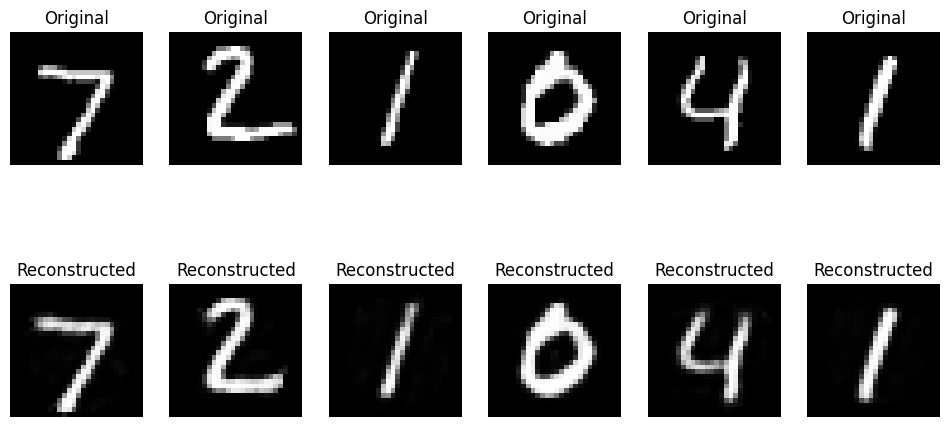

In [10]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

## Explanation

- Pass test images through encoder → get compressed latent vectors.

- Pass latent vectors through decoder → get reconstructed images.

- Display 6 images side by side:

    - Top row: original MNIST test images.

    - Bottom row: autoencoder’s reconstructed images.

- Gray colormap used since images are grayscale.

---
---

# 2. Segmentation & Detection


## 3. GANs
 

# 4. Interpretability

## **What is Model Interpretability?**

- The ability to understand and explain how a deep learning model makes its predictions.

- Classic ML models (trees, linear models) are interpretable by design. Deep neural networks are “black boxes”, making interpretability hard.

## **Why Interpretability Matters**

1. Trust & Transparency
    - Critical in domains like healthcare, finance, legal systems. Stakeholders need to know why a decision was made.
      
2. Bias Detection & Mitigation
    - Helps uncover if the model relies on unfair or sensitive features, enabling corrective action.
      
3. Model Debugging
    - Interpretation reveals which features influence predictions helps improve performance or fix errors.
      
4. Regulatory Compliance
    - Laws like GDPR demand explanations for automated decisions; interpretability is a must-have.

---

## Methods for Achieving Interpretability

Interpretability techniques are classified into two main categories: Intrinsic and Post-hoc.

### 🔍 1. Intrinsic Interpretability

Models that are understandable by design:

- Shallow models: Decision trees, linear/logistic regression → transparent decision rules or weights.
- Attention mechanisms: Especially in transformer models highlight where the model focuses (e.g. translating a word, captioning an image).

### 🛠 2. Post-hoc Interpretability

While deep learning models are inherently complex, several methods have been developed to improve their interpretability. These methods can broadly be classified into intrinsic interpretability and post-hoc interpretability.

- Feature importance:
    - SHAP (Shapley Additive Explanations) and LIME (Local Interpretable Model-agnostic Explanations) show how much each input feature influenced a given prediction.
      
- Saliency maps:
    - Visualize which pixel regions in an image impact classification most.
      
- Activation maximization:
    - Generate input patterns that strongly activate specific neurons, revealing what they represent.
      
- Surrogate models:
    - Train a simpler, interpretable model (like a decision tree) to mimic the behavior of a complex model and use it for explanation.

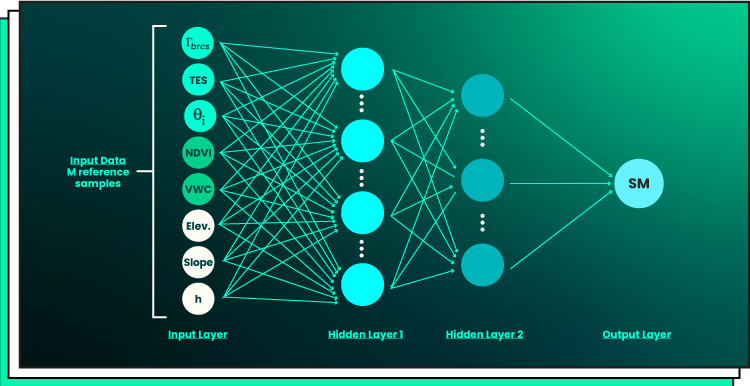

---

## Challenges in Interpretability

Even with methods in place, several issues persist:

1. Accuracy vs Interpretability Trade-off: Simple models are easier to interpret but often perform worse than deep networks. Balancing both is tricky. 
    
    
2. Black-box Complexity: Deep models’ non-linear multi-layer structure defies simple explanation—even post-hoc methods offer only rough approximations. 
    
    
3. Subjectivity: What’s “interpretable” depends on your audience. A data scientist vs a domain expert (e.g. doctor) may require different explanations. 
    
    
4. Scalability: Techniques like SHAP or saliency maps are computationally expensive, especially on large models or datasets.

---

## Applications of Model Interpretability

Model interpretability is becoming increasingly crucial in several domains:

- **Healthcare**: In medical applications, interpretability can help doctors and healthcare professionals trust AI-driven diagnoses by providing explanations for why a model predicts a particular condition.
  
- **Finance**: Financial institutions are subject to regulations requiring explanations for automated decisions, such as loan approvals. Interpretability ensures compliance and helps build trust with customers.

  
- **Legal Systems**: AI is being used in legal systems to recommend sentences or assess risk. Interpretability ensures that these decisions can be explained and scrutinized, preventing potential biases from going unchecked.

  
- **Autonomous Vehicles**: Understanding the decisions made by AI systems in self-driving cars is critical for safety and regulatory approval.

---

## Summary Table

| Category | Method | What It Does | Pros / Cons |
| --- | --- | --- | --- |
| **Intrinsic** | Decision trees, attention models | Transparent by design | Easy to explain / May underperform on complex data |
| **Post-hoc** | SHAP, LIME, Saliency, Activation | Explains trained deep models | Flexible / May be approximate or slow |
| **Surrogate** | Interpretable mimic model | Emulates complex model’s decision logic | Good for insight / could misrepresent behavior |

---

---

## Feature visualization
Feature visualization is an interpretability technique which can generate representations to gain insights into the concepts that neural networks have learned.

For example, after training an image classifier to classify animals, we can ask the network to output a picture of what it (with highest possible probability) would consider to be "dog-ish". This picture can then be considered a visualization of the network's dog-detecting “feature”. Such a picture, however, will often not look anything like what a human would call a dog.

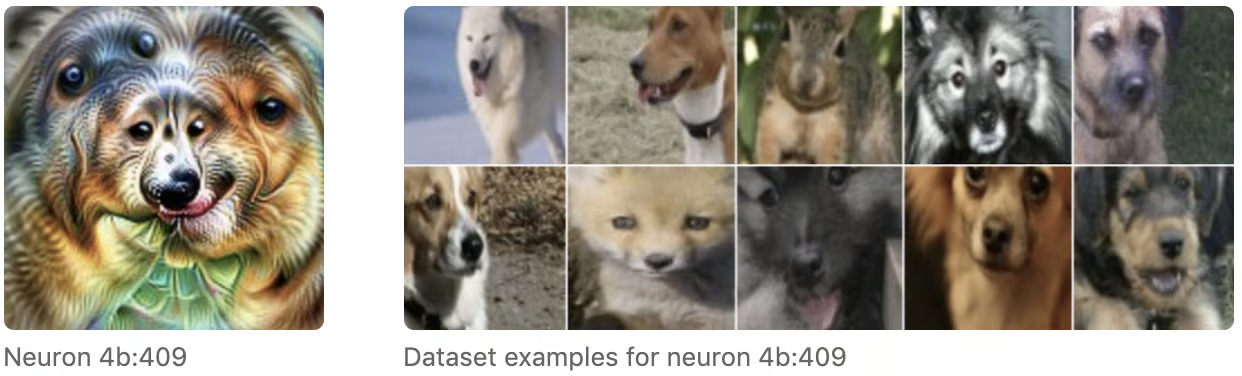

## Goals of Feature Visualization

1. Interpret learned representations
    - Understand how inputs (like pixels, words, or signals) are transformed into features at different layers.
      
2. Debug models
    - Detect if the network is learning irrelevant patterns (e.g., background noise instead of actual objects).
      
3. Trust & transparency
    - Shows users why the model classifies something in a certain way.
      
4. Improve architecture design
    - Provides insights for tuning filters, layer depths, or activation functions.

---

## Approaches to Feature Visualization

### 🔹 1. Activation Visualization

- Visualize the activations (feature maps) of different layers when an input passes through the network.

- Example: Feeding an image into a CNN and visualizing intermediate layer outputs (edges, textures, shapes).

- Low-level layers → simple features (edges, colors).

- High-level layers → abstract concepts (object parts, faces).

---

### 🔹 2. Filter (Weight) Visualization


- Visualize the learned filters (kernels) of convolutional layers directly.

- In early layers, filters look like edge detectors, color blobs.

- In deeper layers, filters become complex patterns (textures, object parts).

---

### 🔹 3. Activation Maximization

- Generate synthetic input images that maximize the activation of a specific neuron/filter.

- Shows what kind of input the neuron is most responsive to.

- Helps answer: “What does this neuron care about?”

---

### 🔹 4. Deconvolution & Guided Backpropagation

- Project feature activations back to input space to see which parts of the input caused strong responses.

- Gives pixel-level visualization of important regions.

---

### 🔹 5. Class Activation Maps (CAM & Grad-CAM)

- Highlight regions in the input image that influenced the model’s decision.

- Widely used in CNN interpretability.

- Example: For an image classified as “dog,” Grad-CAM shows which pixels contributed most to that classification.

## Advantages of Feature Visualization

- Improves model transparency.

- Helps debug overfitting or bias (e.g., network focusing on background instead of object).

- Aids in trust building with stakeholders.

---

## Limitations

- Visualizations may be abstract and hard to interpret for humans.

- Can give approximate or misleading insights (not always 100% faithful).

- Computationally expensive for deep architectures.

---

## ✅ Quick Recap Table

| Method | What It Shows | Example Use Case |
| --- | --- | --- |
| **Activation Maps** | Outputs of intermediate layers | See edges/shapes detected |
| **Filter Visualization** | Weights of CNN kernels | Understand what features filters detect |
| **Activation Maximization** | Input that excites a neuron most | Find neuron’s preferred pattern |
| **Deconv / Guided Backprop** | Map activations back to input space | Pixel-level importance |
| **Grad-CAM** | Heatmap of class-specific importance | Which image regions drove the prediction |



In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


## Explanation

- matplotlib.pyplot → for plotting images and visualizations.

- numpy → for array manipulations.

- tensorflow → main deep learning framework.

- VGG16 → pretrained convolutional neural network from Keras.

- image & preprocess_input → load and preprocess images in a format suitable for VGG16.

In [30]:
model = VGG16(weights='imagenet', include_top=False)


- weights='imagenet' → loads pretrained weights trained on ImageNet.

- include_top=False → removes fully connected layers at the end, keeping only convolutional layers.

- This allows us to use VGG16 as a feature extractor.

In [31]:
img_path = "catimage.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


- Loads the cat image and resizes it to 224x224 (VGG16 input size).

- Converts image to a NumPy array.

- Expands dimensions to (1,224,224,3) because Keras models expect a batch of images.

- preprocess_input → scales pixel values to match VGG16 expectations.

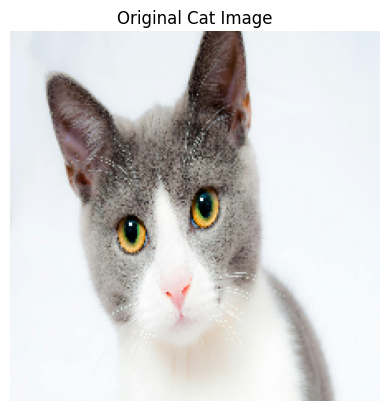

In [32]:
plt.imshow(img)
plt.title("Original Cat Image")
plt.axis("off")
plt.show()


- Plots the original cat image for reference.

In [33]:
feature_model = tf.keras.models.Model(inputs=model.input, outputs=model.output)
features = feature_model.predict(x)  # shape: (1, 7, 7, 512)
feature_vector = features.flatten()  # shape: (7*7*512,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


- Creates a new model that outputs the last convolutional layer of VGG16.

- features → the activations of the last conv layer (1,7,7,512).

- .flatten() → converts 7×7×512 into a 1D vector of size 25088.

- This feature vector can be used for machine learning tasks like clustering, classification, or similarity search.

In [34]:
print("Feature vector shape:", feature_vector.shape)


Feature vector shape: (25088,)


- Confirms the size of the extracted features.

In [35]:
first_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('block1_conv1').output)
activations = first_layer_model.predict(x)  # shape: (1, 224, 224, 64)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


- Creates a model to output the activations (feature maps) of the first convolutional layer.

- activations → each channel shows what the first conv layer “sees” in the image.

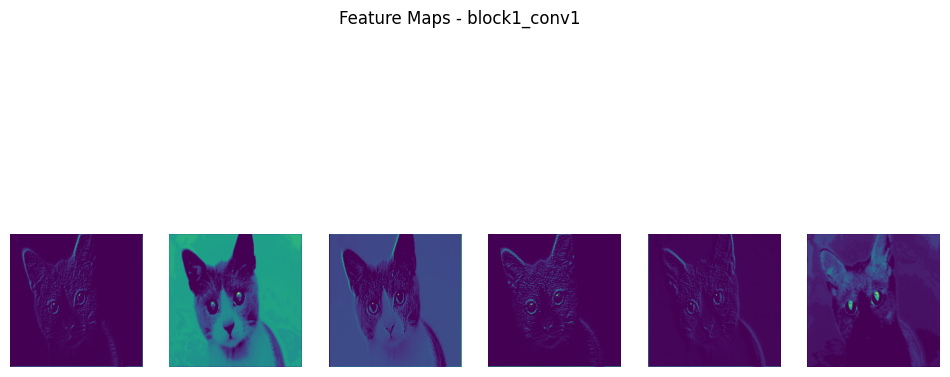

In [36]:
n_features = 6
plt.figure(figsize=(12,6))
for i in range(n_features):
    ax = plt.subplot(1, n_features, i+1)
    plt.imshow(activations[0,:,:,i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Maps - block1_conv1")
plt.show()


- Visualizes 6 feature maps from the first conv layer.

- Shows which patterns or edges the CNN detects at the earliest stag

In [37]:
filters, biases = model.get_layer('block1_conv1').get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


- Gets the learned weights (filters/kernels) of the first conv layer.

- Normalizes them to [0,1] for visualization.

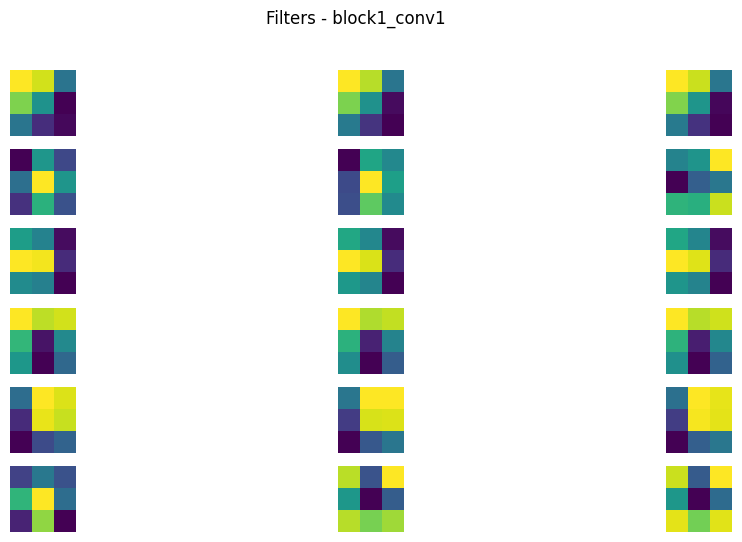

In [38]:
plt.figure(figsize=(12,6))
for i in range(n_features):
    f = filters[:,:,:,i]
    for j in range(3):  # RGB channels
        ax = plt.subplot(n_features, 3, i*3+j+1)
        plt.imshow(f[:,:,j], cmap='viridis')
        plt.axis('off')
plt.suptitle("Filters - block1_conv1")
plt.show()


- Plots filters of the first conv layer.

- Each filter shows what type of patterns the CNN learned to detect in the RGB channels (edges, colors, textures).

---

## Grad-CAM, saliency maps


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


## Explanation

- tensorflow → main library for deep learning.

- numpy → for array manipulation.

- matplotlib.pyplot → to plot images and results.

- VGG16 → pretrained CNN model for image classification.

- image & preprocess_input → to load and preprocess images in a way VGG16 expects.

In [51]:
model = VGG16(weights='imagenet')  # full VGG16


- Loads VGG16 with pretrained weights from ImageNet.

- Includes all convolutional and dense layers (full model).

- Used here to predict the class of the cat image.

In [52]:
img_path = 'catimage.jpg'  # replace with your image
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


- Loads the image and resizes it to 224x224, which is the input size VGG16 expects.

- Converts it to a NumPy array.

- Adds a batch dimension: shape becomes (1, 224, 224, 3).

- preprocess_input normalizes the image pixels the same way VGG16 was trained.

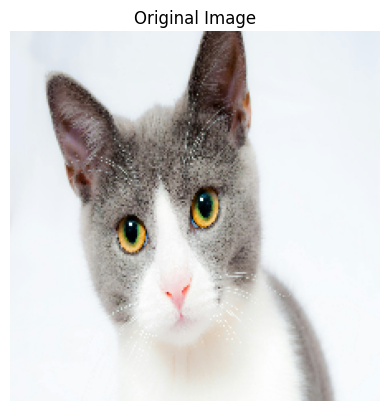

In [53]:
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


- Plots the original cat image for reference.

In [54]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print("Predicted class index:", class_idx)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Predicted class index: 285


- Feeds the image into the model.

- preds contains probabilities for all 1000 ImageNet classes.

- np.argmax gets the index of the most likely class (highest probability).

In [55]:
last_conv_layer = model.get_layer('block5_conv3')
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])


- Selects the last convolutional layer, important for Grad-CAM.

- Creates a new model that outputs:

    - Feature maps from the conv layer.

    - Final predictions.

In [64]:
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    loss = predictions[:, class_idx]


In [65]:
grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap[0].numpy()


- Computes gradient of class score w.r.t feature maps.

- Pools gradients globally → importance weights for each filter.

- Multiplies weights with feature maps → class activation map.

- Normalizes and applies ReLU → only positive contributions.

In [66]:
import cv2
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)


- Resizes heatmap to match image size.

- Converts to color map (JET) for visualization.

- Overlays heatmap on the original image → shows which regions influenced the model.

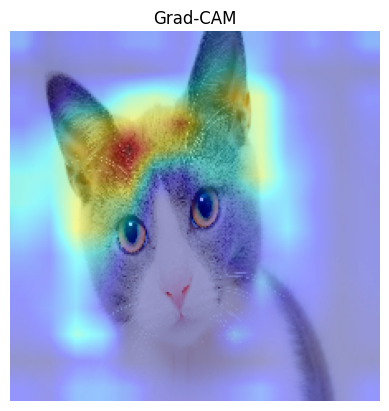

In [67]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM")
plt.axis("off")
plt.show()


- Displays Grad-CAM overlay.

In [68]:
x = tf.convert_to_tensor(x)
with tf.GradientTape() as tape:
    tape.watch(x)
    preds = model(x)
    loss = preds[:, class_idx]


- Watches the input image tensor to compute gradients w.r.t it.

In [69]:
saliency = tape.gradient(loss, x)
saliency = tf.reduce_max(tf.abs(saliency), axis=-1)[0]
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))


- Computes gradient of class score w.r.t input pixels → sensitivity map.

- Takes max across channels (RGB) to get a single intensity map.

- Normalizes to [0,1] for plotting.

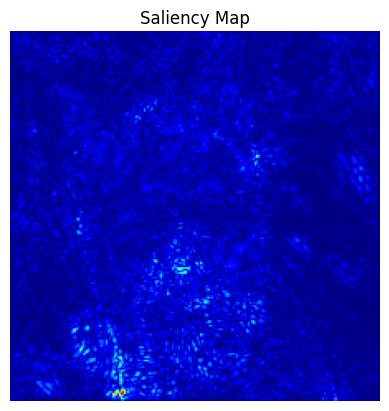

In [70]:
plt.imshow(saliency, cmap='jet')
plt.title("Saliency Map")
plt.axis("off")
plt.show()


- Plots the Saliency Map, highlighting pixels that affect the class prediction most.